In [11]:
#!/bin/python
import pandas as pd
import numpy as np
import scipy.sparse as scs
import scipy.linalg as sl
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import seaborn as sns

import sys
sys.path.append('../../cgDNAplus')
from classes.cgDNAclass import cgDNA

In [22]:
name = 'GSM1586782_ScrWT_Exd_14mer_small'
df = pd.read_csv(f'../data/{name}.txt',sep='\t',dtype={'Kmer':str,'relKa':float})
def KL_sym(mu1, cv1, mu2, cv2):
        N = len(mu1)
        mu12 = np.subtract(mu1,mu2)
        d = (np.trace(sl.solve(cv1,cv2)) + np.trace(sl.solve(cv2,cv1)) - 2*N + np.matmul(np.matmul(mu12.T,np.add(sl.inv(cv1),sl.inv(cv2))),mu12))/4
        per_dof = d/N
        return per_dof

def kl(cg0):
    def cal_kl(ix):
        cg = cgDNA(df.loc[ix,'Kmer'])
        return KL_sym(cg0.ground_state,cg0.stiff.todense(),cg.ground_state,cg.stiff.todense())
    return cal_kl

def append_kl(df):
    cg0 = cgDNA(df.loc[0,'Kmer'])
    res = kl(cg0) 
    answer = Parallel(n_jobs=2)(delayed(res)(i) for i in range(df.shape[0]))
    df['kl'] = answer
    
    return df

def plotting(df):
    plt.figure(figsize=(10,10))
    sns.scatterplot(x='relKa',y='kl',data=df)
    corr = df.corr().iloc[0,1]
    plt.title(f'{name} {corr}')
    
    
def main():
    tmp = append_kl(df)
    plotting(tmp)
    

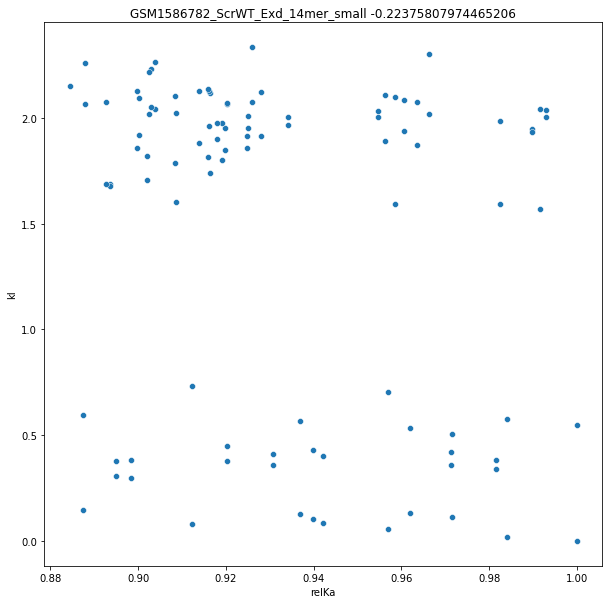

In [23]:
main()

# Get sequence logo

In [1]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Bio import motifs 
from Bio.Seq import Seq

# displays logos inline within the notebook;
# remove if using a python interpreter instead
%matplotlib inline

import logomaker

In [6]:
ls ../res_hpc/gsm_kl_data/files/

GSM1586782_ScrWT_Exd_12mer_kl.csv
GSM1586782_ScrWT_Exd_14mer_kl.csv
GSM1586782_ScrWT_Exd_16mer_cut_kl.csv
GSM1586783_ScrR5A_Exd_12mer_kl.csv
GSM1586783_ScrR5A_Exd_14mer_kl.csv
GSM1586783_ScrR5A_Exd_16mer_cut_kl.csv
GSM1586784_ScrR3A_Exd_12mer_kl.csv
GSM1586784_ScrR3A_Exd_14mer_kl.csv
GSM1586784_ScrR3A_Exd_16mer_cut_kl.csv
GSM1586785_ScrH-12A_Exd_12mer_kl.csv
GSM1586785_ScrH-12A_Exd_14mer_kl.csv
GSM1586785_ScrH-12A_Exd_16mer_cut_kl.csv
GSM1586786_ScrH-12AR3A_Exd_12mer_kl.csv
GSM1586786_ScrH-12AR3A_Exd_14mer_kl.csv
GSM1586786_ScrH-12AR3A_Exd_16mer_cut_kl.csv
GSM1586787_ScrH-12AGQ_Exd_12mer_kl.csv
GSM1586787_ScrH-12AGQ_Exd_14mer_kl.csv
GSM1586787_ScrH-12AGQ_Exd_16mer_cut_kl.csv
GSM1586788_ScrLinkGQ_Exd_12mer_kl.csv
GSM1586788_ScrLinkGQ_Exd_14mer_kl.csv
GSM1586789_AntpWT_Exd_12mer_kl.csv
GSM1586789_AntpWT_Exd_14mer_kl.csv
GSM1586789_AntpWT_Exd_16mer_cut_kl.csv
GSM1586790_AntpHQ_Exd_12mer_kl.csv
GSM1586790_AntpHQ_Exd_14mer_kl.csv
GSM1586790_AntpHQ_Exd_16mer_cut_kl.csv
GSM1586791_AntpHT_Exd_

In [89]:
def load_data(name):
    data = pd.read_csv(f'../res_hpc/gsm_kl_data/files/{name}')
    return data

def get_pwm(data,relKa_interval,kl_interval):
    tmp = data[data['relKa'].le(relKa_interval[0]) & data['relKa'].ge(relKa_interval[1]) & data['kl'].le(kl_interval[0]) & data['kl'].ge(kl_interval[1])]['Kmer']
    DNA_motif = [ ]
    for elm in tmp:
        DNA_motif.append(Seq(elm))
    seq = motifs.create(DNA_motif)
    data = [list(seq.counts[i,:]) for i in ['A','T','C','G']]
    freq = pd.DataFrame(data,index=['A','T','C','G'])
    vtmp = freq.T/freq.loc[:,1].sum()
    
    return vtmp

def plot_pssm_kl(data):
    data.plot.scatter(x='relKa',y='kl',c='DarkBlue')
    
    
def plot_logo(vtmp):

    # create Logo object
    crp_logo = logomaker.Logo(vtmp,
                          shade_below=.5,
                          fade_below=.5,
                          font_name='Arial Rounded MT Bold')

    # style using Logo methods
    crp_logo.style_spines(visible=False)
    crp_logo.style_spines(spines=['left', 'bottom'], visible=True)
    crp_logo.style_xticks(rotation=90, fmt='%d', anchor=0)

    # style using Axes methods
    crp_logo.ax.set_ylabel("$Propability$", labelpad=-1)
    crp_logo.ax.xaxis.set_ticks_position('none')
    crp_logo.ax.xaxis.set_tick_params(pad=-1) 

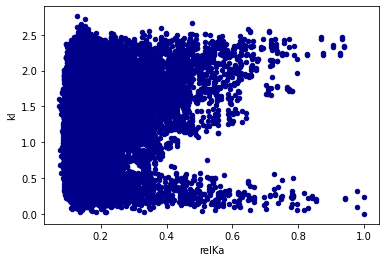

In [90]:
df = load_data('GSM1586782_ScrWT_Exd_12mer_kl.csv')
plot_pssm_kl(df)

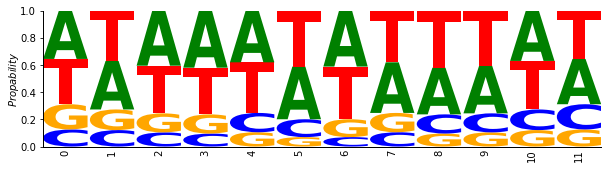

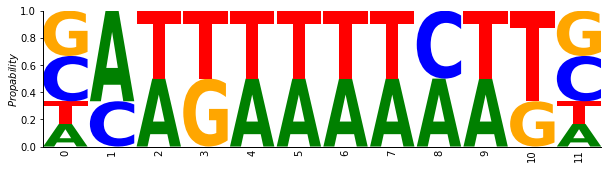

In [92]:
part_pwm0 = get_pwm(df,[1.0,0.0],[3.0,0.0]) 
plot_logo(part_pwm0)
part_pwm1 = get_pwm(df,[0.9,0.8],[1.0,0.0]) 
plot_logo(part_pwm1)
part_pwm2 = get_pwm(df,[0.9,0.8],[2.5,2.0]) 
plot_logo(part_pwm2)